# Import Dataset and Exploratory Data Analysis (EDA)

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('https://raw.githubusercontent.com/ryanznie/budsa-DL-workshop/main/housing_data.csv')
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


Some questions to think about...
* What each columns mean?

* What are the data types of each column?

* Do I have missing data?

Below we will show you 2 ways of checking for missing data.

In [ ]:
data.isna().sum()
# data = data.dropna() # No NAs to drop

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

# Data Transforming / Cleaning (80% of time spent here)

Things to consider... \

*   Outliers?
*   Transforming feature space
*   Preparing the data for modeling 


In [ ]:
#to prevent train-test contamination
data = data.drop(['date', 'street', 'city', 'statezip', 'country'], axis = 1)

X = data.drop('price', axis = 1)
y = data['price']

In [ ]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992


In [ ]:
y.head()

0     313000.0
1    2384000.0
2     342000.0
3     420000.0
4     550000.0
Name: price, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(42) # to ensure we get reproducible results

# Split into train & validation set
X_train, X_val, y_train, y_val = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [ ]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
1898,4.0,2.50,2770,45514,2.0,0,0,4,2770,0,1989,0
1370,4.0,3.00,3720,29043,2.0,0,0,3,3720,0,1991,0
3038,4.0,2.50,2810,11120,2.0,0,0,3,2810,0,1982,0
2361,4.0,3.75,4030,10800,2.0,0,0,3,4030,0,2006,0
156,3.0,2.00,2000,7000,2.0,0,0,3,2000,0,1916,1986


In [ ]:
y_train.head()

1898     685000.0
1370     857000.0
3038     675000.0
2361    1485000.0
156      561000.0
Name: price, dtype: float64

# Building a Neural Network

We'll be using tensorflow to help us build our neural network model.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

### Normalization

It is good practice to normalize features that uses different scales and ranges. Normalization speeds up computations and training.

In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))

## Training Model

In [ ]:
# building the architecture
def build_model(norm):
  
  model = tf.keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss=tf.keras.losses.mean_squared_error,  # MSE
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=['mse'])
  return model

In [ ]:
our_cool_model = build_model(normalizer)

In [ ]:
our_cool_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               25        
 n)                                                              
                                                                 
 dense (Dense)               (None, 64)                832       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,082
Trainable params: 5,057
Non-trainable params: 25
_________________________________________________________________


In [ ]:
# training our model
%%time
history = our_cool_model.fit(
    X_train,
    y_train,
    validation_split=0.2, # I think this splits the X/y_train again. 
    # Try .fit(X_train, y_train, epochs=100, batch_size=64, verbose=1, validation_data=(X_val, y_val))
    epochs=100)

Epoch 1/100
92/92 [==============================] - 6s 9ms/step - loss: 448292913152.0000 - mse: 448292913152.0000 - val_loss: 401482022912.0000 - val_mse: 401482022912.0000
Epoch 2/100
92/92 [==============================] - 1s 8ms/step - loss: 448178618368.0000 - mse: 448178618368.0000 - val_loss: 401267064832.0000 - val_mse: 401267064832.0000
Epoch 3/100
92/92 [==============================] - 1s 6ms/step - loss: 447692439552.0000 - mse: 447692439552.0000 - val_loss: 400577495040.0000 - val_mse: 400577495040.0000
Epoch 4/100
92/92 [==============================] - 1s 7ms/step - loss: 446526849024.0000 - mse: 446526849024.0000 - val_loss: 399219949568.0000 - val_mse: 399219949568.0000
Epoch 5/100
92/92 [==============================] - 1s 8ms/step - loss: 444467970048.0000 - mse: 444467970048.0000 - val_loss: 396917964800.0000 - val_mse: 396917964800.0000
Epoch 6/100
92/92 [==============================] - 1s 9ms/step - loss: 441203720192.0000 - mse: 441203720192.0000 - val_los

In [ ]:
import matplotlib.pyplot as plt

def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [Price]')
  plt.legend()
  plt.grid(True)

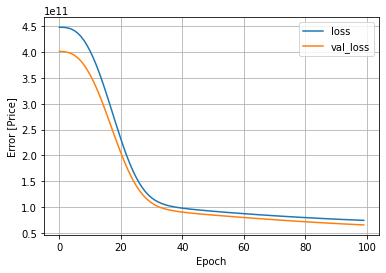

In [ ]:
plot_loss(history)

In [ ]:
test_results = {}
test_results['model'] = our_cool_model.evaluate(X_val, y_val)


29/29 [==============================] - 0s 2ms/step - loss: 1002174611456.0000 - mse: 1002174611456.0000


# Let's try again!

Play around with different architectures and parameters.

In [ ]:
def build_model2(norm):
  
  model = tf.keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(128, activation='relu'),
      layers.Dense(256, activation='relu'),
      layers.Dense(512, activation='relu'),
      layers.Dense(256, activation='relu'),
      layers.Dense(128, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss=tf.keras.losses.mean_squared_error,  # MSE
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=[tf.keras.metrics.MeanSquaredError()])
  return model

In [ ]:
our_second_model = build_model2(normalizer)

In [ ]:
our_second_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               25        
 n)                                                              
                                                                 
 dense_3 (Dense)             (None, 64)                832       
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 256)               33024     
                                                                 
 dense_6 (Dense)             (None, 512)               131584    
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                      

In [ ]:
%%time
history2 = our_second_model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=100)

Epoch 1/100
92/92 [==============================] - 3s 6ms/step - loss: 304941400064.0000 - mean_squared_error: 304941400064.0000 - val_loss: 75274190848.0000 - val_mean_squared_error: 75274190848.0000
Epoch 2/100
92/92 [==============================] - 0s 4ms/step - loss: 89084633088.0000 - mean_squared_error: 89084633088.0000 - val_loss: 63873908736.0000 - val_mean_squared_error: 63873908736.0000
Epoch 3/100
92/92 [==============================] - 0s 4ms/step - loss: 78636204032.0000 - mean_squared_error: 78636204032.0000 - val_loss: 59408994304.0000 - val_mean_squared_error: 59408994304.0000
Epoch 4/100
92/92 [==============================] - 0s 5ms/step - loss: 75979022336.0000 - mean_squared_error: 75979022336.0000 - val_loss: 56295137280.0000 - val_mean_squared_error: 56295137280.0000
Epoch 5/100
92/92 [==============================] - 1s 6ms/step - loss: 71057383424.0000 - mean_squared_error: 71057383424.0000 - val_loss: 54789877760.0000 - val_mean_squared_error: 5478987776

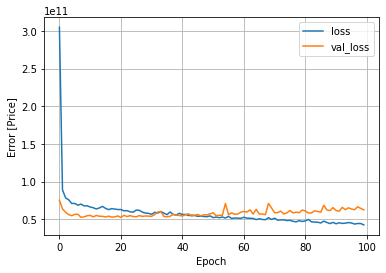

In [ ]:
plot_loss(history2)

# Using your model to make predictions

In [ ]:
prediction = our_cool_model.predict(X_val) # typically the test dataset, but we don't have it here
prediction[:5]

29/29 [==============================] - 0s 1ms/step


array([[ 344874.78],
       [ 338359.3 ],
       [1161063.8 ],
       [ 490641.44],
       [ 314418.28]], dtype=float32)

In [ ]:
# happy with your model?
# save it!

our_cool_model.save('1st_model')
